In [1]:
import time
import sys

sys.path.append('/Users/cjw/Projects/cjw/Unet')

from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

from unet import unet
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
params = dict()

params['width'] = 256
params['height'] = 256
params['depth'] = 96
params['nchannels'] = 1
params['channels'] = [1]
params['nepochs'] = [1]
params['batchsize'] = [2]
params['learning_rate'] = 0.0001
params['restore'] = False
params['latent_size'] = 1
params['enc_sizes'] = [[16,3], [32, 3], [64, 3], [128, 3]]
params['dec_sizes'] = [[64,3], [32, 3], [16, 3], [params['nchannels'], 3]]
params['droprate'] = 0
params['stdev'] = 0.04

In [27]:

tf.reset_default_graph()
u = unet.unet3d(params)


In [28]:
u.read_images('Nuclei.tif')
u.x = u.x[:,:,:,16:80,:]
u.x.shape

(36, 256, 256, 64, 2)

In [29]:

images = tf.placeholder(tf.float32, (None, 256, 256, 64, params['nchannels']))
masks = tf.placeholder(tf.float32, (None, 256, 256, 64, params['nchannels']))

In [30]:
enc = u.create_encoder(images, True)

[16, 3]
[32, 3]
[64, 3]
[128, 3]


In [31]:
d = u.create_decoder()
u.create_loss(masks)
u.create_opt()

3 Tensor("Maximum_5:0", shape=(?, 32, 32, 8, 64), dtype=float32)
2 Tensor("Maximum_3:0", shape=(?, 64, 64, 16, 32), dtype=float32)
1 Tensor("Maximum_1:0", shape=(?, 128, 128, 32, 16), dtype=float32)
0 Tensor("Placeholder:0", shape=(?, 256, 256, 64, 1), dtype=float32)


In [32]:
sess = tf.Session()

In [33]:
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(10):
    nr = np.random.randint(0,36, 1)
    bx = np.expand_dims(u.x[nr,:,:,:,0], -1)
    bm = np.expand_dims(u.x[nr,:,:,:,1], -1)
    print(bx.shape)
    _, res = sess.run([u.opt, u.decoder_sigmoid], feed_dict={images:bx, masks:bm})
    plt.imshow(res)
    

(1, 256, 256, 64, 1)


In [206]:
u.create_loss(masks)
ss = sess.run(u.loss, feed_dict={images:yy, masks:bb})

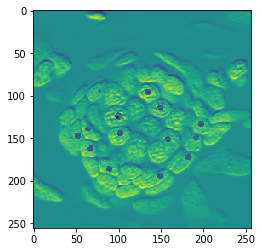

In [208]:
ss.shape
plt.imshow(ss[0,:,:,44,0])

In [219]:
rt = y[0,:,:,:,:]
from scipy.ndimage import rotate

res = rotate(rt, 45, (0, 1), order=2)

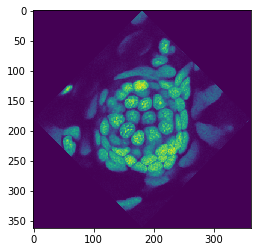

In [220]:
plt.imshow(res[:,:,44,0])